In [4]:
#import Library 
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from sklearn import mixture
# from copy import copy, deepcopy


# Part 2

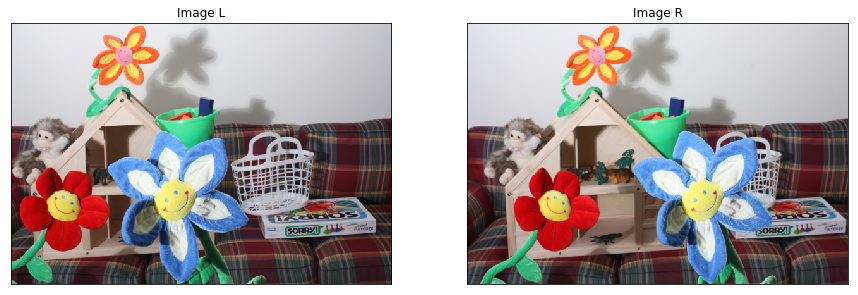

In [2]:
# Read an image
imgL = cv2.cvtColor(cv2.imread('im1 (1).png'), cv2.COLOR_BGR2RGB)
imgR = cv2.cvtColor(cv2.imread('im0 (1).png'), cv2.COLOR_BGR2RGB)





plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL)
plt.title("Image L"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR)
plt.title("Image R"), plt.xticks([]), plt.yticks([])
plt.show()

[[-1.4345156e-18 -1.0000000e+00  1.8400000e+02]
 [-1.4345156e-18 -1.0000000e+00  1.8400000e+02]
 [-2.7870790e-18 -1.0000000e+00  2.2600000e+02]
 ...
 [-3.7796124e-18 -1.0000000e+00  2.6900000e+02]
 [-4.3273619e-18 -1.0000000e+00  2.8600000e+02]
 [-1.3868853e-19 -1.0000000e+00  1.5600000e+02]]


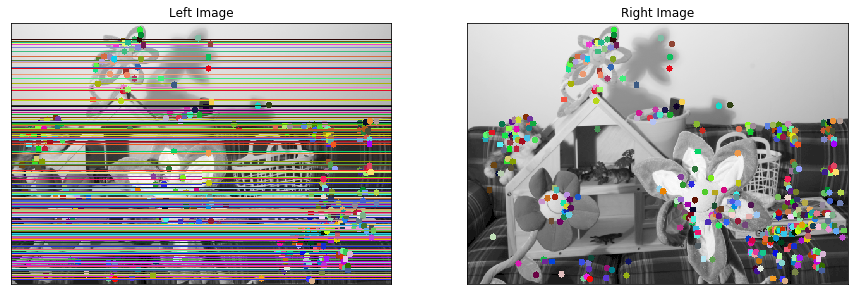

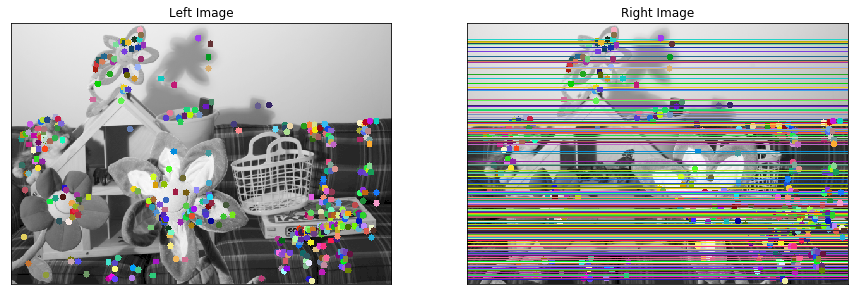

In [5]:
""" drawlines """
def drawlines(img1, img2, lines, pts1, pts2):
    """
    Draw epilines. Epilines corresponding to the points in 
    the first image are drawn on the second image.
    :param img1: image on which we draw the epilines for the points
            in img2
    :param lines: corresponding epilines
    """
    # img1 shape
    row, col = img1.shape
    # convert from grayscale to BGR
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    # for each line
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        # pick a random color
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [col, -(r[2]+r[0]*col)/r[1]])
        # draw the lines and the points
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2, y0, x0, x1

# load left and right images
imgL = cv2.imread("im1 (1).png", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread("im0 (1).png", cv2.IMREAD_GRAYSCALE)

# the fundamental matrix
sift = cv2.xfeatures2d.SIFT_create()
# create a Brute-Force Matcher
bfMatcher = cv2.BFMatcher(cv2.NORM_L2)

# find keypoints and descriptors with SIFT
kpL, desL = sift.detectAndCompute(imgL, None)
kpR, desR = sift.detectAndCompute(imgR, None)

# Now, we want to match keypoints and remove matches on repeatative structure.
# match descriptors (find the best two matches for each descriptor)
matches = bfMatcher.knnMatch(desL, desR, k=2) # query image, train image

# ratio test - store the list of best matches from both images
good = []
ptsL = []
ptsR = []
for i, (m, n) in enumerate(matches):
    if m.distance < 0.6 * n.distance:
        good.append(m)
        ptsR.append(kpR[m.trainIdx].pt)
        ptsL.append(kpL[m.queryIdx].pt)

# find the Fundamental Matrix
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS) 


# Use only inliers for remaining computations
ptsL = ptsL[mask.ravel()==1]
ptsR = ptsR[mask.ravel()==1]

# find epilines
# Epilines corresponding to points in the first image is drawn on the
# second image
linesL = cv2.computeCorrespondEpilines(ptsR, 2, F)
linesL = linesL.reshape(-1, 3)
# draw lines
imgL1, imgR1,y1,x0,x1 = drawlines(imgL, imgR, linesL, ptsL, ptsR)

linesR = cv2.computeCorrespondEpilines(ptsL, 1, F)
linesR = linesR.reshape(-1, 3)
print(linesR)
# draw lines
imgR2, imgL2,y1,x0,x1 = drawlines(imgR, imgL, linesR, ptsR, ptsL)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL1, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR1, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL2, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR2, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()

Random point is :
[209  36]


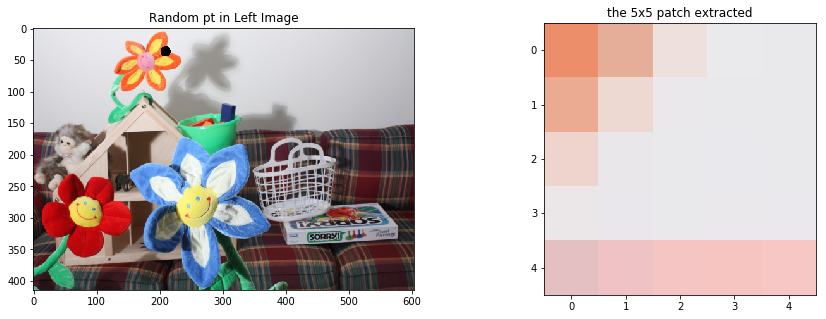

In [6]:

imgL = cv2.imread("im1 (1).png")
imgL_c= cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
imgL_cc=imgL_c.copy()

#pich a random point from the left img
random_pt = ptsL[120]
print("Random point is :" ) , print(random_pt)

# get the point coordinates
x = random_pt[0]
y = random_pt[1]

start_point = (x-2, y-2) 
end_point = (x+3, y+3) 

# extracte a box of 5x5 around that point from the left img
imgL_box= imgL_cc[y-2:y+3,x-2:x+3]

# show the random point choosen on the left img
image = cv2.rectangle(imgL_c, start_point, end_point, 0, 10) 


# display images
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Random pt in Left Image")
plt.subplot(122), plt.imshow(imgL_box, cmap="gray")
plt.title("the 5x5 patch extracted")
plt.show()


Random point is :[[209  36]]
The lines corresponding  to this point is: [[ 3.4693144e-18 -1.0000000e+00  3.6000000e+01]]
y0 = 36,  x0 = 0,  x1 = 603


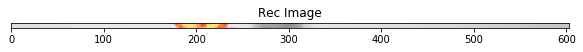

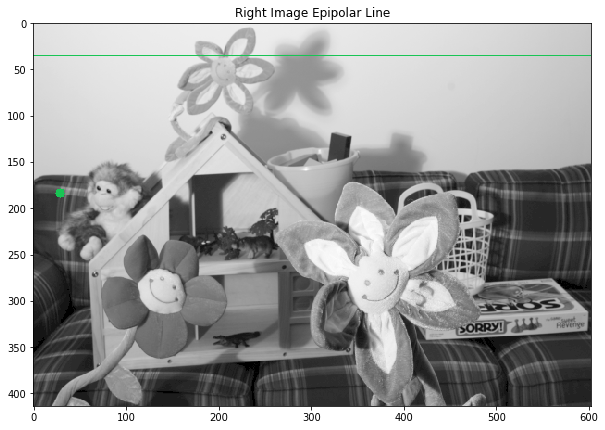

Match is found at point = ( [0] , [234])


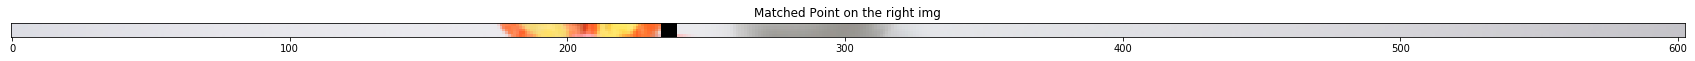

In [7]:
imgL = cv2.imread("im1 (1).png", cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread("im0 (1).png", cv2.IMREAD_GRAYSCALE)

imgR_c = cv2.imread("im0 (1).png")
imgR_cc= cv2.cvtColor(imgR_c, cv2.COLOR_BGR2RGB)

#convert the random point to a 2d array
random_2d = np.reshape(random_pt, (-1, 2))
print("Random point is :" + str(random_2d))
# compute the line corresponding  to this point on the right img
lineR = cv2.computeCorrespondEpilines(random_2d, 1, F)


lineR = lineR.reshape(-1, 3)
print("The lines corresponding  to this point is: " + str(lineR))

# use the draw line method from the tutorial to drw the line
imgR2, imgL2, y0, x0, x1 = drawlines(imgR, imgL, lineR, ptsR, ptsL)

# the x and y coordinate are extracted as well to know the location of the line (y0 =y1)
print( "y0 = "+ str(y0) + ",  x0 = " + str(x0) + ",  x1 = " +str(x1))

# crop a rectangle around that img with hight 5 around the line and along the x-axis
rec_R = imgR_cc[y0-2:y0+3,x0:x1]

#display the extracted line
plt.figure(figsize=(10,10))
plt.imshow(rec_R, cmap="gray")
plt.title("Rec Image"),plt.yticks([])
plt.show()

# display image with the line drawn 
plt.figure(figsize=(10,10))
plt.imshow(imgR2, cmap="gray")
plt.title("Right Image Epipolar Line")
plt.show()

img = cv2.imread("im0 (1).png")
imgR = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgR_c = rec_R.copy()

# using matchTemplate with the extcted patch and the extracted rec img 
# since the window size is 5x5 this will over this Epipolar Line on 5x5 patches to find a match for the random pt
#normalized cross correlation metric is user for matching as specified
res = cv2.matchTemplate(rec_R, imgL_box, cv2.TM_CCOEFF_NORMED)

ht, wt = imgL_box.shape[0:2]
# set a threshold (need to tune it)
thres = 0.9
# find all points above threshold
# have to decide we want up oe down treshold
loc = np.where(res >= thres)  # return 2D location

# the match was found on this location
print("Match is found at point = ( "  + str(loc[0]) + " , " + str(loc[1]) + ")" )


# loop though the points
# get pixel value (X) and location value (y)
for pt in zip(*loc[::-1]):
    cv2.rectangle(rec_R, pt, (pt[0]+wt, pt[1]+ht), (0,0,0), -1)

# display images
plt.figure(figsize=(30,10))
plt.imshow(rec_R)
plt.title("Matched Point on the right img"), plt.yticks([])
plt.show()

The max correlation value found is: 0.995202362537384at x = 234


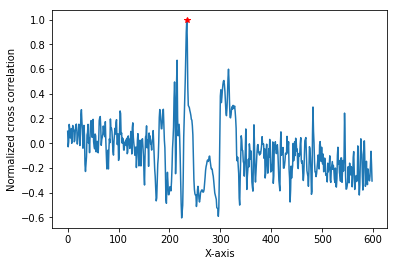

In [8]:

locations = np.where(res)
x_loc = locations[1]
y_loc = locations[0]

#convert the corroletion values and the x-axis values to a list to plot them
res_T = np.transpose(res)
x_loc_list = x_loc.tolist()
res_list = res_T.tolist()

# find the max point and it's location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

print("The max correlation value found is: " + str(max_val) + "at x = " + str(max_loc[0]))

plt.plot(x_loc_list,res_list)
plt.plot(max_loc[0],max_val, 'r*')
plt.xlabel('X-axis')
plt.ylabel('Normalized cross correlation')
plt.show()


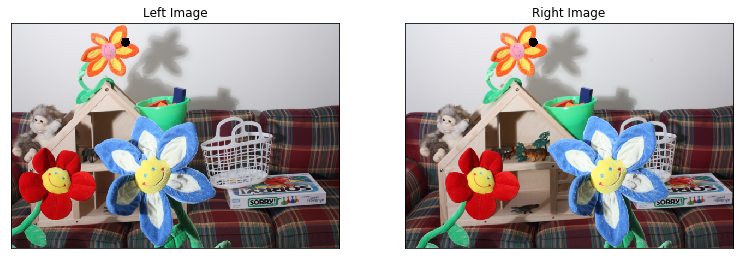

In [9]:
#Display found matching points in both the images
img = cv2.imread("im0 (1).png")
imgR = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# drwaing a rec tangle over the best match found in the right img
x_R = max_loc[0]
y_R=y0
start_point = (x_R-2, y_R-2) 
end_point = (x_R+3, y_R+3) 

image_R = cv2.rectangle(imgR, start_point, end_point, 0, 10) 

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(image)
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_R)
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()